In [25]:
import ephem
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [26]:
def read_file(file_path):
    data = dict()
    with open(file_path, 'r') as f:
        i = 0
        for line in f.readlines():
            if i == 0:
                name = line.rstrip()
            elif i == 1:
                line1 = line.rstrip()
            elif i == 2:
                line2 = line.rstrip()

            if i == 2:
                data[name] = (line1, line2)
                i = 0
            else:
                i += 1
    return data

data_lines = read_file("../data/active_satellites.tle.txt")

data = dict()
for key, value in data_lines.items():
    tle_rec = ephem.readtle(key, value[0], value[1])
    data[tle_rec.catalog_number] = tle_rec

sat_ids = np.zeros(len(data))
names = [] 
for i, key in enumerate(data):
    sat_ids[i] = data[key].catalog_number
    names.append(data[key].name)

data_df = pd.DataFrame({
    'NORAD Number' : sat_ids,
    'SAT_NAME' : names
})
data_df = data_df.set_index('NORAD Number')

In [45]:
NAME = "STARLINK-5508"
sat = data[NAME]

tle_rec = ephem.readtle(NAME, sat[0], sat[1])
tle_rec.compute('2022/12/05')

KeyError: 'STARLINK-5508'

In [44]:
tle_rec.name

'2023-041B'

In [34]:
tle_rec.catalog_number

55639

In [36]:
database.loc[database['NORAD Number'] == 55639.0]

,Official Name of Satellite,Country/Organization of UN Registry,Operator/Owner,Country of Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of Geosynchronous Orbit (Degrees),...,Dry Mass (Kilograms),Power (Watts),Date of Launch,Expected Lifetime (Years),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number


In [37]:
database.columns

Index(['Official Name of Satellite', 'Country/Organization of UN Registry',
       'Operator/Owner', 'Country of Operator/Owner', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of Geosynchronous Orbit (Degrees)', 'Perigee (Kilometers)',
       'Apogee (Kilometers)', 'Eccentricity', 'Inclination (Degrees)',
       'Period (Minutes)', 'Launch Mass (Kilograms)', 'Dry Mass (Kilograms)',
       'Power (Watts)', 'Date of Launch', 'Expected Lifetime (Years)',
       'Contractor', 'Country of Contractor', 'Launch Site', 'Launch Vehicle',
       'COSPAR Number', 'NORAD Number'],
      dtype='object')

In [27]:
database = pd.read_csv("../data/database.csv")
database

,Official Name of Satellite,Country/Organization of UN Registry,Operator/Owner,Country of Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of Geosynchronous Orbit (Degrees),...,Dry Mass (Kilograms),Power (Watts),Date of Launch,Expected Lifetime (Years),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number
0,AAUSat-4,NR,University of Aalborg,Denmark,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.00,...,NaN,NaN,4/25/2016,NaN,University of Aalborg,Denmark,Guiana Space Center,Soyuz 2.1a,2016-025E,41460.0
1,ABS-2,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,75.00,...,NaN,16000,2/6/2014,15,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508.0
2,ABS-2A,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,-75.00,...,NaN,NaN,6/15/2016,15,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588.0
3,ABS-3,Philippines,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,146.06,...,1800,9000,8/19/1997,15,Space Systems/Loral,USA,Xichang Satellite Launch Center,Long March CZ3B,1997-042A,24901.0
4,ABS-3A,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,-3.00,...,NaN,NaN,3/2/2015,15,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2015-010A,40424.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,Zhongxing 9,China,China Satellite Communication Corp. (China Sat...,China,Government,Communications,NaN,GEO,NaN,92.22,...,NaN,NaN,6/9/2008,NaN,Thales Alenia Space,France,Xichang Satellite Launch Center,Long March 3B,2008-028A,33051.0
1416,Zijing 1,NR,Tsinghua University,China,Civil,Technology Development,NaN,LEO,Sun-Synchronous,0.00,...,NaN,NaN,9/19/2015,NaN,Tsinghua University,China,Taiyuan Launch Center,Long March 6,2015-049W,40919.0
1417,Ziyuan 1-02C,China,China Centre for Resources Satellite Data and ...,China,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,0.00,...,NaN,NaN,12/22/2011,NaN,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2011-079A,38038.0
1418,Ziyuan 3,China,China Centre for Resources Satellite Data and ...,China,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,0.00,...,NaN,NaN,1/9/2012,4,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2012-001A,38046.0


In [8]:
isro = pd.read_csv("../data/ISRO Satellite Dataset.csv")
isro

,Unnamed: 0,Satellite ID(Fake),"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,...,Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments
0,0,1,CartoSat 1 (IRS P5),CartoSat 1,India,India,Indian Space Research Organization (ISRO),Government,Earth Observation,Optical Imaging,...,1100.0,2005-05-05,6.0,Indian Space Research Organization (ISRO),India,Satish Dhawan Space Centre,PSLV C6,2005-017A,28649.0,"Remote sensing and mapping, land use, forest c..."
1,1,2,"CartoSat 2 (IRS P7, CartoSat 2AT)",CartoSat 2,India,India,Indian Space Research Organization (ISRO),Government,Earth Observation,Optical Imaging,...,NaN,2007-01-10,5.0,Indian Space Research Organization (ISRO),India,Satish Dhawan Space Centre,PSLV C7,2007-001B,29710.0,Remote sensing and mapping; panchromatic image...
2,2,3,CartoSat 2A,CartoSat 2A,India,India,Indian Space Research Organization (ISRO),Military,Earth Observation,Optical Imaging,...,NaN,2008-04-28,5.0,Indian Space Research Organization (ISRO),India,Satish Dhawan Space Centre,PSLV C9,2008-021A,32783.0,Military version of CartoSat 2; dedicated sate...
3,3,4,CartoSat 2B,CartoSat 2B,India,India,Indian Space Research Organization (ISRO),Government,Earth Observation,Optical Imaging,...,NaN,2010-07-12,5.0,Indian Space Research Organization (ISRO),India,Satish Dhawan Space Centre,PSLV,2010-035A,36795.0,"Resource mapping, urban planning, transportati..."
4,4,5,CartoSat 2C,CartoSat 2C,India,India,Indian Space Research Organization (ISRO),Government,Earth Observation,Optical Imaging,...,NaN,2016-06-22,5.0,Indian Space Research Organization (ISRO),India,Satish Dhawan Space Centre,PSLV XL,2016-040A,41599.0,Lower orbit for military application.
5,5,6,CartoSat 2D,CartoSat 2D,India,India,Indian Space Research Organization (ISRO),Government,Earth Observation,Optical Imaging,...,NaN,2017-02-15,5.0,Indian Space Research Organization (ISRO),India,Satish Dhawan Space Centre,PSLV XL,2017-008A,41948.0,"Resource mapping, urban planning, transportati..."
6,6,7,CartoSat 2E,CartoSat 2E,India,India,Indian Space Research Organization (ISRO),Government,Earth Observation,Optical Imaging,...,NaN,2017-06-22,5.0,Indian Space Research Organization (ISRO),India,Satish Dhawan Space Centre,PSLV,2017-036C,42767.0,"Resource mapping, urban planning, transportati..."
7,7,8,CartoSat 2F,CartoSat 2F,India,India,Indian Space Research Organization (ISRO),Government,Earth Observation,Optical Imaging,...,NaN,2018-01-11,5.0,Indian Space Research Organization (ISRO),India,Satish Dhawan Space Centre,PSLV,2018-004A,43111.0,"Resource mapping, urban planning, transportati..."
8,8,9,CartoSat 3,CartoSat 3,India,India,Indian Space Research Organization (ISRO),Government,Earth Observation,Optical Imaging,...,NaN,2019-11-27,5.0,Indian Space Research Organization (ISRO),India,Satish Dhawan Space Centre,PSLV,2019-081A,44804.0,Most advanced earth observation satellite deve...
9,9,10,CMS-1 (GSAT 12R),CMS-1,NR (12/20),India,Indian Space Research Organization (ISRO),Government,Communications,NaN,...,NaN,2020-12-17,15.0,Indian Space Research Organization (ISRO),India,Satish Dhawan Space Centre,PSLV-XL,2020-099A,47256.0,NaN


In [18]:
isro.columns

Index(['Unnamed: 0', 'Satellite ID(Fake)',
       'Name of Satellite, Alternate Names',
       'Current Official Name of Satellite', 'Country/Org of UN Registry',
       'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', 'Dry Mass (kg.)', 'Power (watts)',
       'Date of Launch', 'Expected Lifetime (yrs.)', 'Contractor',
       'Country of Contractor', 'Launch Site', 'Launch Vehicle',
       'COSPAR Number', 'NORAD Number', 'Comments'],
      dtype='object')

In [9]:
spacex = pd.read_csv("../data/SpaceX Satellite Dataset.csv")
spacex

,Unnamed: 0,Satellite ID(Fake),Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Users,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),...,Period (minutes),Launch Mass (kg.),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number
0,0,1,Starlink-1007,USA,USA,Commercial,LEO,Non-Polar Inclined,0.0,559.0,...,95.9,227.0,2019-11-11,NaN,SpaceX,USA,Cape Canaveral,Falcon 9,2019-074A,44713.0
1,1,2,Starlink-1008,USA,USA,Commercial,LEO,Non-Polar Inclined,0.0,549.0,...,95.6,227.0,2019-11-11,NaN,SpaceX,USA,Cape Canaveral,Falcon 9,2019-074B,44714.0
2,2,3,Starlink-1009,USA,USA,Commercial,LEO,Non-Polar Inclined,0.0,549.0,...,95.5,227.0,2019-11-11,NaN,SpaceX,USA,Cape Canaveral,Falcon 9,2019-074C,44715.0
3,3,4,Starlink-1010,USA,USA,Commercial,LEO,Non-Polar Inclined,0.0,533.0,...,95.3,227.0,2019-11-11,NaN,SpaceX,USA,Cape Canaveral,Falcon 9,2019-074D,44716.0
4,4,5,Starlink-1011,USA,USA,Commercial,LEO,Non-Polar Inclined,0.0,548.0,...,95.6,227.0,2019-11-11,NaN,SpaceX,USA,Cape Canaveral,Falcon 9,2019-074E,44717.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,897,898,Starlink-71,USA,USA,Commercial,LEO,Non-Polar Inclined,0.0,548.0,...,95.7,227.0,2019-05-24,NaN,SpaceX,USA,Cape Canaveral,Falcon 9,2019-029T,44252.0
898,898,899,Starlink-73,USA,USA,Commercial,LEO,Non-Polar Inclined,0.0,548.0,...,95.7,227.0,2019-05-24,NaN,SpaceX,USA,Cape Canaveral,Falcon 9,2019-029BB,44284.0
899,899,900,Starlink-75,USA,USA,Commercial,LEO,Non-Polar Inclined,0.0,546.0,...,95.7,227.0,2019-05-24,NaN,SpaceX,USA,Cape Canaveral,Falcon 9,2019-029BD,44286.0
900,900,901,Starlink-76,USA,USA,Commercial,LEO,Non-Polar Inclined,0.0,549.0,...,95.7,227.0,2019-05-24,NaN,SpaceX,USA,Cape Canaveral,Falcon 9,2019-029BE,44287.0


In [19]:
spacex.columns

Index(['Unnamed: 0', 'Satellite ID(Fake)',
       'Current Official Name of Satellite', 'Country/Org of UN Registry',
       'Country of Operator/Owner', 'Users', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', 'Date of Launch', 'Expected Lifetime (yrs.)',
       'Contractor', 'Country of Contractor', 'Launch Site', 'Launch Vehicle',
       'COSPAR Number', 'NORAD Number'],
      dtype='object')

# Compute statistics per all dataset

In [20]:
files = ['../data/database.csv', '../data/ISRO Satellite Dataset.csv', '../data/SpaceX Satellite Dataset.csv']

for f in files:
    other_df = pd.read_csv(f)
    other_df = other_df.set_index('NORAD Number')

    result = data_df.join(other_df, how='inner')

    print(f'{f} => {len(result)} rows')

../data/database.csv => 939 rows
../data/ISRO Satellite Dataset.csv => 43 rows
../data/SpaceX Satellite Dataset.csv => 746 rows


# Compute plots

In [28]:
tmp = pd.DataFrame(database)
tmp = tmp.set_index('NORAD Number')

result = data_df.join(tmp, how='inner')
print(len(result))

939


In [23]:
result

,SAT_NAME,Official Name of Satellite,Country/Organization of UN Registry,Operator/Owner,Country of Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,...,Launch Mass (Kilograms),Dry Mass (Kilograms),Power (Watts),Date of Launch,Expected Lifetime (Years),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number
NORAD Number,,,,,,,,,,,,,,,,,,,,,
7530.0,OSCAR 7 (AO-7),Amsat-Oscar 7,USA,Amsat-NA,USA,Civil,Communications,NaN,LEO,Polar,...,29,NaN,NaN,11/15/1974,NaN,Amsat-NA,USA,Vandenberg AFB,Delta 2310,1974-089B
19548.0,TDRS 3,TDRS-3,USA,National Aeronautics and Space Administration ...,USA,Government,Communications,NaN,GEO,NaN,...,3180,1600,1800,9/29/1988,10,TRW Defense and Space Systems Group,USA,Cape Canaveral,Space Shuttle (STS 26),1988-091B
20253.0,FLTSATCOM 8 (USA 46),USA 46,USA,US Navy,USA,Military,Communications,NaN,GEO,NaN,...,2310,1884,NaN,9/25/1989,5,"TRW, Defense and Space Systems Group",USA,Cape Canaveral,Atlas Centaur,1989-077A
20580.0,HST,Hubble Space Telescope,USA,European Space Agency/NASA,ESA/USA,Government,Space Science,NaN,LEO,Non-Polar Inclined,...,11110,NaN,2400,4/25/1990,10,European Space Agency/NASA,International,Cape Canaveral,Space Shuttle (STS 31),1990-037B
20776.0,SKYNET 4C,Skynet 4C,United Kingdom,Intelsat/Paradigm Secure Communications (wholl...,United Kingdom,Military,Communications,NaN,GEO,NaN,...,1474,850,1200,8/30/1990,7,Astrium,France/UK/Germany,Guiana Space Center,Ariane 44LP,1990-079A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41604.0,BIROS,BIROS,NR,German Aerospace Center (DLR),Germany,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,...,130,NaN,NaN,6/22/2016,NaN,German Aerospace Center (DLR),Germany,Satish Dhawan Space Centre,PSLV XL,2016-040F
41605.0,M3MSAT,M3MSat,NR,Defence Research and Development Canada (DRDC)...,Canada,Government,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,...,85,NaN,NaN,6/22/2016,NaN,Com Dev International (Honeywell Canada),Canada,Satish Dhawan Space Center,PSLV XL,2016-040G
41607.0,SWAYAM,Swayam,NR,"College of Engineering, Pune",India,Civil,Technology Development,NaN,LEO,Sun-Synchronous,...,1,NaN,NaN,6/22/2016,NaN,"College of Engineering, Pune",India,Satish Dhawan Space Center,PSLV XL,2016-040J


In [5]:
result.columns

Index(['SAT_NAME', 'Official Name of Satellite',
       'Country/Organization of UN Registry', 'Operator/Owner',
       'Country of Operator/Owner', 'Users', 'Purpose', 'Detailed Purpose',
       'Class of Orbit', 'Type of Orbit',
       'Longitude of Geosynchronous Orbit (Degrees)', 'Perigee (Kilometers)',
       'Apogee (Kilometers)', 'Eccentricity', 'Inclination (Degrees)',
       'Period (Minutes)', 'Launch Mass (Kilograms)', 'Dry Mass (Kilograms)',
       'Power (Watts)', 'Date of Launch', 'Expected Lifetime (Years)',
       'Contractor', 'Country of Contractor', 'Launch Site', 'Launch Vehicle',
       'COSPAR Number'],
      dtype='object')

Text(0.5, 1.0, 'Purpose of the satellite')

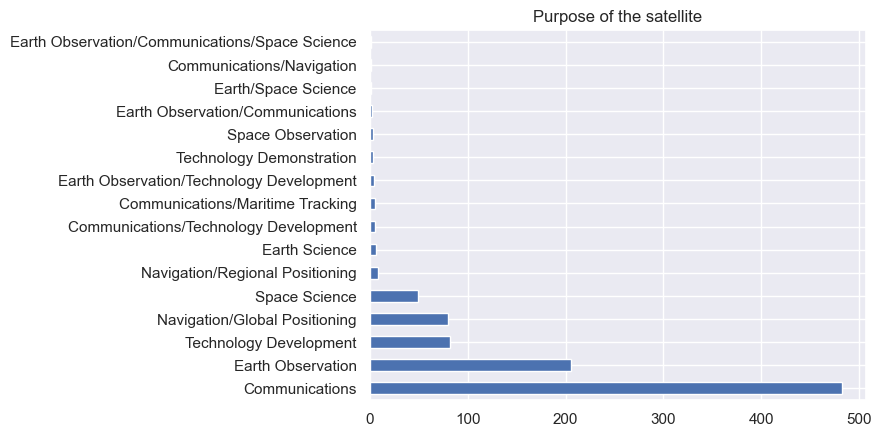

In [37]:
result['Purpose'].value_counts().plot(kind='barh')
plt.title("Purpose of the satellite")

Text(0.5, 1.0, 'Country of the satellite')

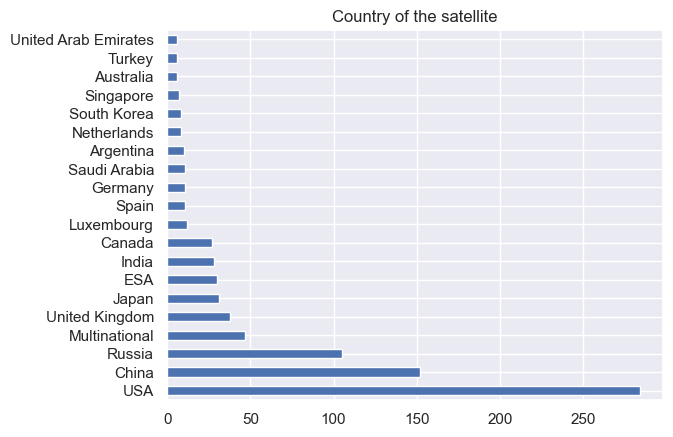

In [47]:
result['Country of Operator/Owner'].value_counts(ascending=False)[:20].plot(kind='barh')
plt.title("Country of the satellite")

Text(0.5, 1.0, 'Usage of the satellite')

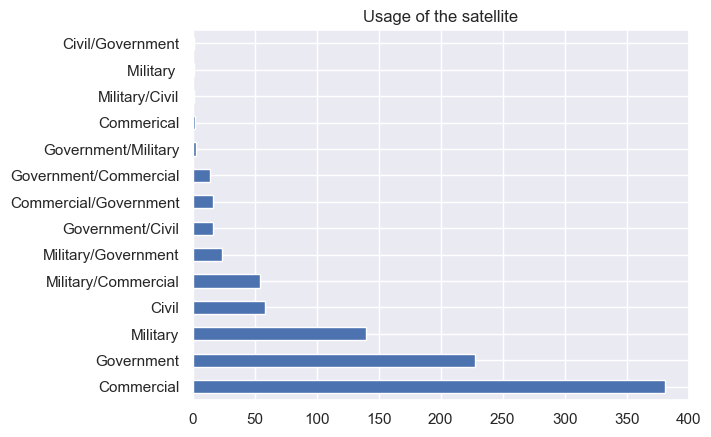

In [39]:
result['Users'].value_counts().plot(kind='barh')
plt.title("Usage of the satellite")